In [ ]:
#1 objective = energy purchase kWhr x electrict tariff
#2 objective = overall LF

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
plt.rcParams['figure.figsize'] = 20, 10
import matplotlib.gridspec as gridspec
plt.rcParams.update({'font.size': 22})

In [142]:
#tariff rate: off-peak (0.00-9.00, 22.00-24.00) = 2.6295
# peak (9.00 -22.00 )=4.2097
#energy charge = 132.93 THB/kW
array_tarrif=np.array([2.6295 for x in np.arange(0,18,1)]+[4.2097 for x in np.arange(0,26,1)]+[2.6295 for x in np.arange(0,4,1)])

In [2]:
dict_AMR_MC=np.load('dict_MC_AMR.npy')[()]


In [6]:
dict_tarrif={}
for AMR_id in list(dict_AMR_MC.keys()):
    dict_tarrif.update({AMR_id:np.array([2.6295 for x in np.arange(0,18,1)]+[4.2097 for x in np.arange(0,26,1)]+[2.6295 for x in np.arange(0,4,1)])})

In [7]:
dict_tarrif

{21652: array([2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295,
        2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295,
        2.6295, 2.6295, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097,
        4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097,
        4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097,
        4.2097, 4.2097, 4.2097, 4.2097, 2.6295, 2.6295, 2.6295, 2.6295]),
 136898: array([2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295,
        2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295,
        2.6295, 2.6295, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097,
        4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097,
        4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097,
        4.2097, 4.2097, 4.2097, 4.2097, 2.6295, 2.6295, 2.6295, 2.6295]),
 137091: array([2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295,
        2.6295, 2.6295, 2.6295, 2.629

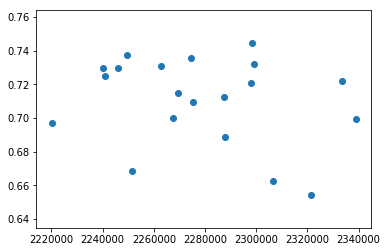

In [8]:
dict_AMR_MC=np.load('dict_MC_AMR.npy')[()]


#energy purchasing
array_sub_cost=([[],[],[],[],[],
                  [],[],[],[],[],
                  [],[],[],[],[],
                  [],[],[],[],[]])
for AMR_id in list(dict_AMR_MC.keys()):
#     print(AMR_id)
    array_kW=np.array([[],[],[],[],[],
                  [],[],[],[],[],
                  [],[],[],[],[],
                  [],[],[],[],[]])
    for t in list(dict_AMR_MC[AMR_id].keys()):
        kW_data=np.array([[dict_AMR_MC[AMR_id][t][sample]] for sample in np.arange(0,20,1)])
        array_kW=np.append(array_kW, kW_data, axis=1)
#     array_AMR_cost=array_kW*array_tarrif
    array_AMR_cost=array_kW*dict_tarrif[AMR_id]

    array_AMR_cost.sum(axis=1)
#     print(array_AMR_cost.sum(axis=1))
#     print(np.array([[x] for x in array_AMR_cost.sum(axis=1)]))
    array_sub_cost=np.append(array_sub_cost, np.array([[x] for x in array_AMR_cost.sum(axis=1)]), axis=1)
#     array_sub_cost=array_sub_cost+np.array([[x] for x in array_AMR_cost.sum(axis=1)])
array_sub_cost=np.array([x.sum() for x in array_sub_cost])



#find substation LF
array_sub_LF=np.array([])
for sample in np.arange(0,20,1):
    array_sum_kW=np.array([])
    for t in ['t{}'.format(x) for x in np.arange(0,48,1)]:
        array_AMR_kW=np.array([dict_AMR_MC[AMR_id][t][sample] for AMR_id in list(dict_AMR_MC.keys())])
        array_sum_kW=np.append(array_sum_kW,array_AMR_kW.sum())
    LF=array_sum_kW.mean()/array_sum_kW.max()
    array_sub_LF=np.append(array_sub_LF,LF)

    
fig, ax = plt.subplots()
ax.scatter(array_sub_cost,array_sub_LF)
plt.show()